# Imports

In [1]:
import tensorflow as tf

In [2]:
import numpy as np 
import pandas as pd

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import Ridge
import numpy as np 
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder
from dateutil import parser
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error
from scipy.stats import pearsonr

In [115]:
datam = [
    [
        2.30e-01, 1.77e+02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
    ]
]
datam=np.array(datam)
datam.shape

(1, 71)

# Data Loading and Visualization

In [4]:
data=pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [5]:
data.head()
data.drop(columns=['Order ID', 'Customer Name','State'], inplace=True)

## Data cleaning

In [6]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [7]:
print(data.isnull().sum())

Category        0
Sub Category    0
City            0
Order Date      0
Region          0
Sales           0
Discount        0
Profit          0
dtype: int64


### Lets Seperate Year and Month Seperately

In [8]:
data['year'] = data['Order Date'].apply(lambda x: parser.parse(x).year)
data['month'] = data['Order Date'].apply(lambda x:parser.parse(x).month)

In [9]:
data.drop(columns=['Order Date'], inplace=True)
data.head()

,Category,Sub Category,City,Region,Sales,Discount,Profit,year,month
0,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,2017,11
1,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,2017,11
2,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,2017,6
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,2016,10
4,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,2016,10


In [10]:
data2=pd.DataFrame()
data2=data

## Encoding Categorical Values

In [11]:
cat = LabelEncoder()
data['cat']=cat.fit_transform(data['Category'])
sub = LabelEncoder()
data['sub']=sub.fit_transform(data['Sub Category'])
city = LabelEncoder()
data['city']=sub.fit_transform(data['City'])
reg = LabelEncoder()
data['reg']=reg.fit_transform(data['Region'])

## lets do onehot encoding also

In [12]:
encoder1 = OneHotEncoder(sparse_output=False, drop='first')

encoded = encoder1.fit_transform(data[['Category']])

encoded_df = pd.DataFrame(encoded, columns=encoder1.get_feature_names_out(['Category']))

data = pd.concat([data, encoded_df], axis=1).drop(columns=['Category'])



In [13]:
encoder2 = OneHotEncoder(sparse_output=False, drop='first')

encoded = encoder2.fit_transform(data[['City']])

encoded_df = pd.DataFrame(encoded, columns=encoder2.get_feature_names_out(['City']))

data = pd.concat([data, encoded_df], axis=1).drop(columns=['City'])


In [14]:
encoder3 = OneHotEncoder(sparse_output=False, drop='first')

encoded = encoder3.fit_transform(data[['Sub Category']])

encoded_df = pd.DataFrame(encoded, columns=encoder3.get_feature_names_out(['Sub Category']))

data = pd.concat([data, encoded_df], axis=1).drop(columns=['Sub Category'])


In [15]:
encoder4 = OneHotEncoder(sparse_output=False, drop='first')

encoded = encoder4.fit_transform(data[['Region']])

encoded_df = pd.DataFrame(encoded, columns=encoder4.get_feature_names_out(['Region']))

data = pd.concat([data, encoded_df], axis=1).drop(columns=['Region'])

encoder5 = OneHotEncoder(sparse_output=False, drop='first')

encoded = encoder5.fit_transform(data[['year']])

encoded_df = pd.DataFrame(encoded, columns=encoder5.get_feature_names_out(['year']))

data = pd.concat([data, encoded_df], axis=1).drop(columns=['year'])
encoder6 = OneHotEncoder(sparse_output=False, drop='first')

encoded = encoder6.fit_transform(data[['month']])

encoded_df = pd.DataFrame(encoded, columns=encoder6.get_feature_names_out(['month']))

data = pd.concat([data, encoded_df], axis=1).drop(columns=['month'])




In [16]:
data.head()

,Sales,Discount,Profit,cat,sub,city,reg,Category_Beverages,"Category_Eggs, Meat & Fish",Category_Food Grains,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1254,0.12,401.28,5,14,21,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,749,0.18,149.80,1,13,8,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2360,0.21,165.20,3,0,13,4,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,896,0.25,89.60,4,12,4,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2355,0.26,918.45,3,18,12,3,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
data.columns

Index(['Sales', 'Discount', 'Profit', 'cat', 'sub', 'city', 'reg',
       'Category_Beverages', 'Category_Eggs, Meat & Fish',
       'Category_Food Grains', 'Category_Fruits & Veggies',
       'Category_Oil & Masala', 'Category_Snacks', 'City_Chennai',
       'City_Coimbatore', 'City_Cumbum', 'City_Dharmapuri', 'City_Dindigul',
       'City_Kanyakumari', 'City_Karur', 'City_Krishnagiri', 'City_Madurai',
       'City_Nagercoil', 'City_Namakkal', 'City_Ooty', 'City_Perambalur',
       'City_Pudukottai', 'City_Ramanadhapuram', 'City_Salem', 'City_Tenkasi',
       'City_Theni', 'City_Tirunelveli', 'City_Trichy', 'City_Vellore',
       'City_Viluppuram', 'City_Virudhunagar', 'Sub Category_Biscuits',
       'Sub Category_Breads & Buns', 'Sub Category_Cakes',
       'Sub Category_Chicken', 'Sub Category_Chocolates',
       'Sub Category_Cookies', 'Sub Category_Dals & Pulses',
       'Sub Category_Edible Oil & Ghee', 'Sub Category_Eggs',
       'Sub Category_Fish', 'Sub Category_Fresh Fruits',

In [18]:
data2

,Category,Sub Category,City,Region,Sales,Discount,Profit,year,month,cat,sub,city,reg
0,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,2017,11,5,14,21,2
1,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,2017,11,1,13,8,3
2,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,2017,6,3,0,13,4
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,2016,10,4,12,4,3
4,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,2016,10,3,18,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,West,945,0.16,359.10,2015,12,2,9,9,4
9990,Bakery,Biscuits,Kanyakumari,West,1195,0.26,71.70,2015,7,0,1,6,4
9991,Food Grains,Rice,Bodi,West,1567,0.16,501.44,2017,6,3,20,0,4
9992,Oil & Masala,Spices,Pudukottai,West,1659,0.15,597.24,2018,10,5,22,14,4


In [124]:
data2["Region"].value_counts().index

Index(['West', 'East', 'Central', 'South', 'North'], dtype='object', name='Region')

In [19]:
cat_data=data2["Category"].value_counts()
sub_data=data2["Sub Category"].value_counts()
city_data=data2["City"].value_counts()
region_data=data2["Region"].value_counts()

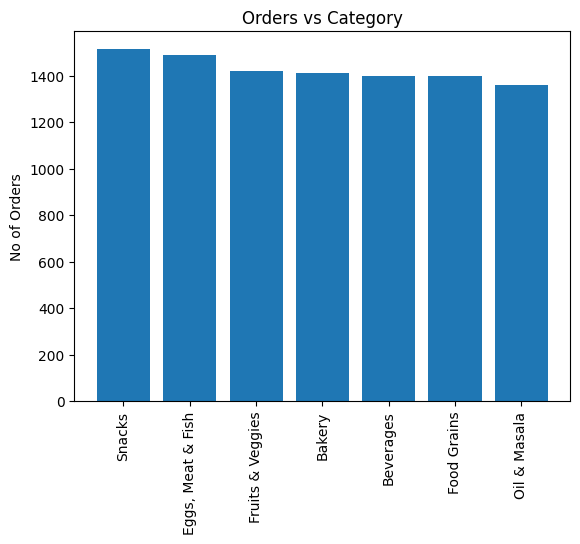

In [20]:
plt.bar(cat_data.index,cat_data)
plt.xticks(rotation=90)
plt.ylabel("No of Orders")
plt.title("Orders vs Category")
print("")


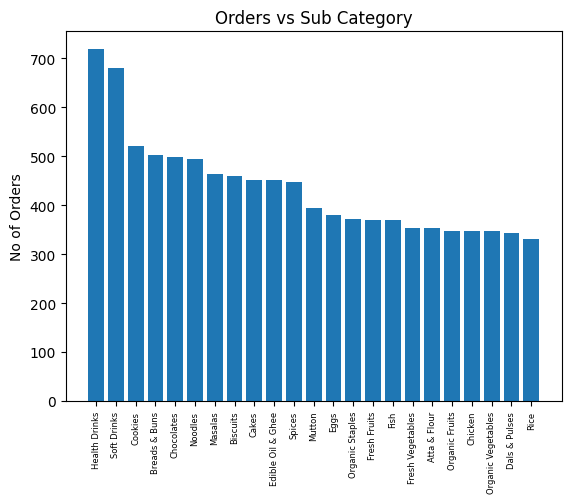

In [21]:
plt.bar(sub_data.index,sub_data)
plt.xticks(rotation=90,fontsize=6)
plt.ylabel("No of Orders")
plt.title("Orders vs Sub Category")
print("")

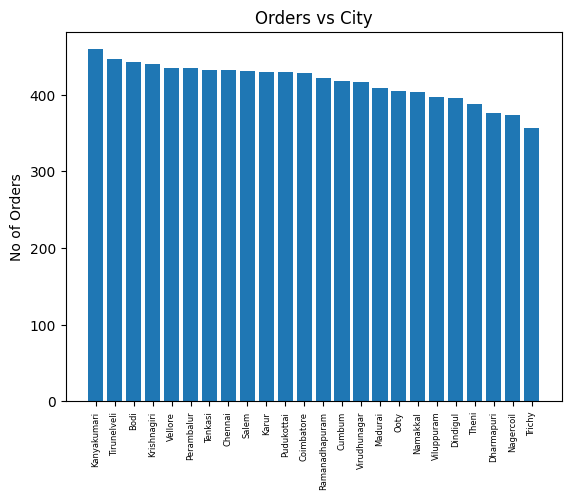

In [22]:
plt.bar(city_data.index,city_data)
plt.xticks(rotation=90,fontsize=6)
plt.ylabel("No of Orders")
plt.title("Orders vs City")
print("")

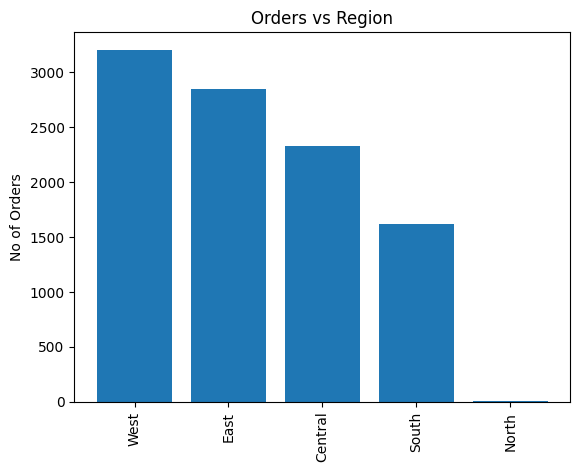

In [23]:
plt.bar(region_data.index,region_data)
plt.xticks(rotation=90)
plt.ylabel("No of Orders")
plt.title("Orders vs Region")
print("")

In [24]:
Total_data=data.iloc[:,[7,8,9,11,12,13,14,15,16]]

In [25]:
corr_matrix=Total_data.corr()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

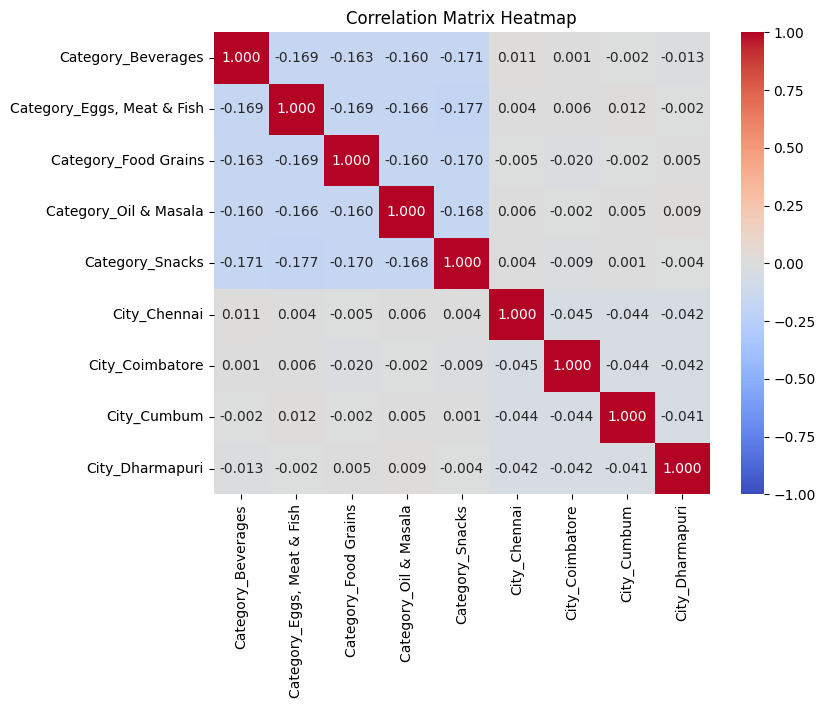

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,         
    cmap='coolwarm',    
    fmt='.3f',          
    vmin=-1, vmax=1 
)
plt.title('Correlation Matrix Heatmap')

In [27]:
corr_matrix

,Category_Beverages,"Category_Eggs, Meat & Fish",Category_Food Grains,Category_Oil & Masala,Category_Snacks,City_Chennai,City_Coimbatore,City_Cumbum,City_Dharmapuri
Category_Beverages,1.000000,-0.168946,-0.162769,-0.160256,-0.170542,0.010609,0.001487,-0.002040,-0.013138
"Category_Eggs, Meat & Fish",-0.168946,1.000000,-0.168806,-0.166199,-0.176867,0.003582,0.005813,0.012405,-0.001561
Category_Food Grains,-0.162769,-0.168806,1.000000,-0.160123,-0.170400,-0.004865,-0.019762,-0.001921,0.005160
Category_Oil & Masala,-0.160256,-0.166199,-0.160123,1.000000,-0.167770,0.005981,-0.001853,0.004687,0.008886
Category_Snacks,-0.170542,-0.176867,-0.170400,-0.167770,1.000000,0.003508,-0.009426,0.001156,-0.004342
City_Chennai,0.010609,0.003582,-0.004865,0.005981,0.003508,1.000000,-0.044960,-0.044353,-0.042026
City_Coimbatore,0.001487,0.005813,-0.019762,-0.001853,-0.009426,-0.044960,1.000000,-0.044138,-0.041822
City_Cumbum,-0.002040,0.012405,-0.001921,0.004687,0.001156,-0.044353,-0.044138,1.000000,-0.041258
City_Dharmapuri,-0.013138,-0.001561,0.005160,0.008886,-0.004342,-0.042026,-0.041822,-0.041258,1.000000


## There is no Good Correlation between any of the the given features

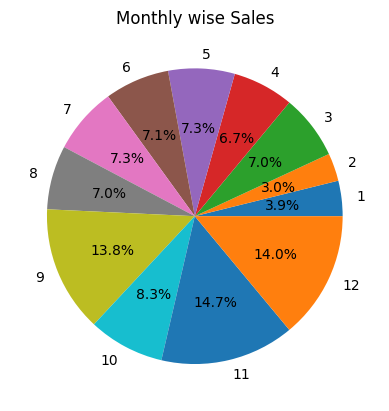

In [28]:
monthly_sales=(data2.groupby('month')['Sales'].sum()/data2['Sales'].sum())*100
plt.pie(monthly_sales,labels=monthly_sales.index,autopct='%1.1f%%')
plt.title("Monthly wise Sales")
print()

### The Sales are more in the month of September,November and December

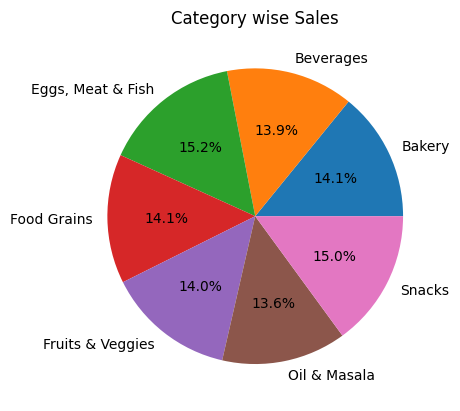

In [29]:
cat_sales=(data2.groupby('Category')['Sales'].sum()/data2['Sales'].sum())*100
plt.pie(cat_sales,labels=cat_sales.index,autopct='%1.1f%%')
plt.title("Category wise Sales")
print("")

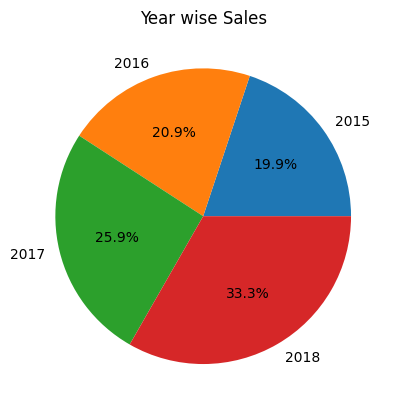

In [30]:
yr_sales=(data2.groupby('year')['Sales'].sum()/data2['Sales'].sum())*100
plt.pie(yr_sales,labels=yr_sales.index,autopct='%1.1f%%')
plt.title("Year wise Sales")
print("")

# Seperating Features and Labels

In [31]:
data.columns

Index(['Sales', 'Discount', 'Profit', 'cat', 'sub', 'city', 'reg',
       'Category_Beverages', 'Category_Eggs, Meat & Fish',
       'Category_Food Grains', 'Category_Fruits & Veggies',
       'Category_Oil & Masala', 'Category_Snacks', 'City_Chennai',
       'City_Coimbatore', 'City_Cumbum', 'City_Dharmapuri', 'City_Dindigul',
       'City_Kanyakumari', 'City_Karur', 'City_Krishnagiri', 'City_Madurai',
       'City_Nagercoil', 'City_Namakkal', 'City_Ooty', 'City_Perambalur',
       'City_Pudukottai', 'City_Ramanadhapuram', 'City_Salem', 'City_Tenkasi',
       'City_Theni', 'City_Tirunelveli', 'City_Trichy', 'City_Vellore',
       'City_Viluppuram', 'City_Virudhunagar', 'Sub Category_Biscuits',
       'Sub Category_Breads & Buns', 'Sub Category_Cakes',
       'Sub Category_Chicken', 'Sub Category_Chocolates',
       'Sub Category_Cookies', 'Sub Category_Dals & Pulses',
       'Sub Category_Edible Oil & Ghee', 'Sub Category_Eggs',
       'Sub Category_Fish', 'Sub Category_Fresh Fruits',

In [32]:
data.head()

,Sales,Discount,Profit,cat,sub,city,reg,Category_Beverages,"Category_Eggs, Meat & Fish",Category_Food Grains,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1254,0.12,401.28,5,14,21,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,749,0.18,149.80,1,13,8,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2360,0.21,165.20,3,0,13,4,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,896,0.25,89.60,4,12,4,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2355,0.26,918.45,3,18,12,3,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
features=data.drop(columns=['Sales','cat','sub','city','reg'])
target=data['Sales']

In [34]:
features

,Discount,Profit,Category_Beverages,"Category_Eggs, Meat & Fish",Category_Food Grains,Category_Fruits & Veggies,Category_Oil & Masala,Category_Snacks,City_Chennai,City_Coimbatore,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.12,401.28,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.18,149.80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.21,165.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.25,89.60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.26,918.45,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0.16,359.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9990,0.26,71.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9991,0.16,501.44,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9992,0.15,597.24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
fea2=data.drop(columns=['cat','sub','city','reg'])

In [36]:
corr_matrix=fea2.corr()

In [37]:
corr_matrix

,Sales,Discount,Profit,Category_Beverages,"Category_Eggs, Meat & Fish",Category_Food Grains,Category_Fruits & Veggies,Category_Oil & Masala,Category_Snacks,City_Chennai,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Sales,1.000000,-0.005512,0.605349,-0.004953,0.018228,0.011503,-0.010649,0.000795,-0.013676,-0.009854,...,0.008405,-0.000883,-0.008681,-0.010239,0.018076,-0.006620,-0.002773,0.011102,-0.003701,-0.009527
Discount,-0.005512,1.000000,0.000017,0.018990,0.005468,0.009353,0.013499,-0.012188,-0.027003,-0.001549,...,0.004189,0.005402,-0.007964,0.007181,0.011272,-0.001899,0.001871,0.002135,0.005381,-0.010630
Profit,0.605349,0.000017,1.000000,0.000834,0.010188,0.006012,-0.001506,-0.015071,0.000610,-0.002156,...,0.010472,-0.004978,-0.019070,-0.008943,0.013619,-0.009430,-0.000905,0.003502,0.005316,0.002547
Category_Beverages,-0.004953,0.018990,0.000834,1.000000,-0.168946,-0.162769,-0.164120,-0.160256,-0.170542,0.010609,...,-0.000565,0.007415,0.013296,0.001742,-0.008371,0.010240,-0.010634,-0.006021,0.000762,-0.011799
"Category_Eggs, Meat & Fish",0.018228,0.005468,0.010188,-0.168946,1.000000,-0.168806,-0.170207,-0.166199,-0.176867,0.003582,...,0.004673,-0.007415,0.000451,0.012087,-0.011869,-0.003571,0.010421,0.005014,-0.009761,0.009756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
month_8,-0.006620,-0.001899,-0.009430,0.010240,-0.003571,0.022789,-0.004668,-0.009273,-0.020643,0.014368,...,-0.075431,-0.073787,-0.077679,-0.076647,-0.076244,1.000000,-0.110491,-0.082372,-0.114538,-0.111647
month_9,-0.002773,0.001871,-0.000905,-0.010634,0.010421,-0.002890,-0.001019,-0.010425,0.005244,0.006011,...,-0.109646,-0.107257,-0.112914,-0.111414,-0.110827,-0.110491,1.000000,-0.119736,-0.166492,-0.162289
month_10,0.011102,0.002135,0.003502,-0.006021,0.005014,0.019388,-0.008577,-0.004821,-0.011265,-0.004309,...,-0.081743,-0.079961,-0.084178,-0.083061,-0.082623,-0.082372,-0.119736,1.000000,-0.124122,-0.120989
month_11,-0.003701,0.005381,0.005316,0.000762,-0.009761,-0.001441,0.000232,0.001381,0.005638,0.008908,...,-0.113663,-0.111186,-0.117050,-0.115496,-0.114887,-0.114538,-0.166492,-0.124122,1.000000,-0.168235


In [38]:
cr_data=corr_matrix.iloc[:,0].values

In [39]:
# Xdata=data.iloc[:,[8,9,11,12,13,14,15,16]]
Xdata=features.values
Ydata=target.values


## Splitting the Dataset

In [40]:
x_train,x_test,y_train,y_test=train_test_split(Xdata,Ydata,test_size=0.2,random_state=42)

In [41]:
x_train.shape

(7995, 71)

## Multiple Linear Regression Model

In [100]:
model_01 = LinearRegression()
model_01.fit(x_train,y_train)
y_pred=model_01.predict(x_test)
Score_01=mean_absolute_error(y_test,y_pred)
print("MAE for Linear Regression: "+str(Score_01))

MAE for Linear Regression: 381.5641667879838


In [126]:
model_01.predict(data3)

array([1.1462982e+12])

## The Linear regression model is showing too high sales for some inputs so even it has good MAE its good to avoid it

In [101]:
model_01.predict(datam)

array([5.49885182e+11])

## In the Above example its showing a high value of Sales so we will avoid this model

In [44]:
model_02=DecisionTreeRegressor(random_state=0)
model_02.fit(x_train,y_train)
y_pred2=model_02.predict(x_test)
Score_02=mean_absolute_error(y_test,y_pred2)
print("MAE for Decision Tree Regression: "+str(Score_02))

MAE for Decision Tree Regression: 497.63931965982994


In [45]:
model_03=RandomForestRegressor(n_estimators=50)
model_03.fit(x_train,y_train)
y_pred3=model_03.predict(x_test)
Score_03=mean_absolute_error(y_pred3,y_test)
print("MAE for Random Forest Regression: "+str(Score_03))

MAE for Random Forest Regression: 385.87838919459733


## XGB REGRESSION

In [46]:
model_04 = XGBRegressor()
model_04.fit(x_train,y_train)
y_pred4=model_04.predict(x_test)
Score_04=mean_absolute_error(y_pred4,y_test)
print("MAE for XGB: "+str(Score_04))

MAE for XGB: 401.4511060614536


## Ensemble Models

In [47]:
bgmodel = BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=10)
bgmodel.fit(x_train,y_train)
ypred_bg=bgmodel.predict(x_test)
score_bg=mean_absolute_error(ypred_bg,y_test)
print("MAE for Bagging Regressor: ",score_bg)

MAE for Bagging Regressor:  381.9517258629315


In [48]:
abgmodel = AdaBoostRegressor(estimator=RandomForestRegressor(),n_estimators=10)
abgmodel.fit(x_train,y_train)
ypred_abg=abgmodel.predict(x_test)
score_abg=mean_absolute_error(ypred_abg,y_test)
print("MAE for AdaBooster Regressor: ",score_abg)

MAE for AdaBooster Regressor:  386.8198899449725


## Due to the Outliers the Accuracy is negative by r^2 metric.So we are choosing MAE as metric

# We will eliminate Decision Tree as it is Least Until Now and Also Linear Regression Model

## Lets create a Neural Network

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=450, activation='relu'))
model.add(tf.keras.layers.Dense(units=150, activation='relu'))
model.add(tf.keras.layers.Dense(units=300, activation='relu'))
model.add(tf.keras.layers.Dense(units=150, activation='relu'))
model.add(tf.keras.layers.Dense(units=75, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

In [50]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
model.fit(x_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 674.5646 - mae: 674.5646
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 481.6756 - mae: 481.6756
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 399.1219 - mae: 399.1219
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 389.0577 - mae: 389.0577
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 396.2292 - mae: 396.2292
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 380.9607 - mae: 380.9607
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 387.6851 - mae: 387.6851
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 380.8969 - mae: 380.8969
Epoch 9/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 378.7891 - mae: 378.7891
Epoch 10/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 373.6115 - mae: 373.6115
Epoch 11/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 378.1465 - mae: 378.1465
Epoch 12/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38

In [51]:
y_pred5=model.predict(x_test)
Score_06=mean_absolute_error(y_pred5,y_test)
print("MAE for Neural Networks: "+str(Score_06))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAE for Neural Networks: 376.99246218873594


## Lets Combine RandomForest and Neural Network

In [102]:
y_predcom=(y_pred3+y_pred5.reshape(-1))/2

In [103]:
Score_com=mean_absolute_error(y_predcom,y_test)
print("MAE for Combined Model: "+str(Score_com))

MAE for Combined Model: 373.0871706167567


## Hyperparameter Tuning

For Random forest

In [55]:
# model=RandomForestRegressor()
# params={'n_estimators':[10,30,50],'max_depth': [None,10,20,30,40,50],'min_samples_split':[2,4,6]}
# grid_search=GridSearchCV(estimator=model,param_grid=params, cv=5, scoring='neg_mean_absolute_error', verbose=3)
# grid_search.fit(x_train, y_train)
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best score (neg_mean_absolute_error): {grid_search.best_score_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 50}


Best score (neg_mean_absolute_error): -375.5524284868821

In [104]:
model_03=RandomForestRegressor(n_estimators=50,max_depth=10,min_samples_split=6)
model_03.fit(x_train,y_train)
y_pred3=model_03.predict(x_test)
Score_03=mean_absolute_error(y_pred3,y_test)
print("MAE for Random Forest Regression: "+str(Score_03))

MAE for Random Forest Regression: 377.68825338990496


## Lets recombine All the three models for final MAE

In [107]:
final_ypred=(y_pred3+y_pred5.reshape(-1))/2
Score_fin=mean_absolute_error(final_ypred,y_test)
print("MAE for Final Combined Model: "+str(Score_fin))

MAE for Final Combined Model: 373.6166969118486


### This is the minimized MAE after applying different models and combining them.
### We also Created a Neural network as included it as one model
### We also applied Hyper parameter tuning on both random forest model and Linear regression model
## So, 376.30 is the final minimized MAE for this data
### This seems to be high because of many outliers in the data.

In [108]:
std_err=np.std(final_ypred-y_test)
z_score=norm.ppf(0.8)

In [109]:
Range=std_err*z_score

In [110]:
colors = np.where(np.abs(final_ypred-y_test) < z_score*std_err, 'green', 'red')

## 60% confidence interval prediction

Text(0, 0.5, 'Original Sales')

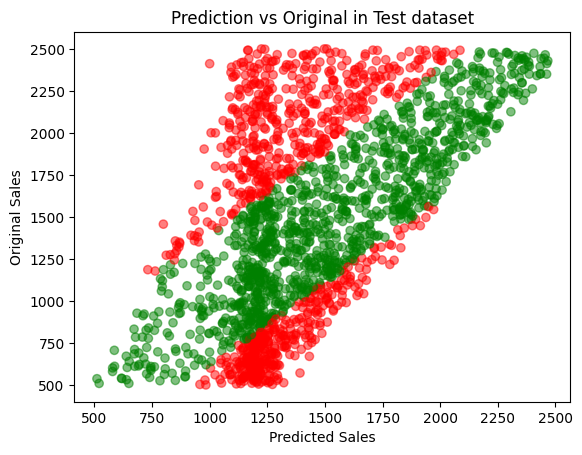

In [111]:
plt.scatter(final_ypred,y_test,c=colors,alpha=0.5)
plt.title("Prediction vs Original in Test dataset")
plt.xlabel("Predicted Sales")
plt.ylabel("Original Sales")

In [112]:
Range

387.93045612158295

# Saving Model used for Regression

In [113]:
joblib.dump(model_03, 'Random_Forest_Regression.pkl')
model.save('ann_model.keras')

In [114]:
joblib.dump(encoder1,'catenc.pkl')
joblib.dump(encoder2,'cityenc.pkl')
joblib.dump(encoder3,'subenc.pkl')
joblib.dump(encoder4,'regenc.pkl')
joblib.dump(encoder5,'yrenc.pkl')
joblib.dump(encoder6,'monthenc.pkl')

['monthenc.pkl']